In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [74]:
dat = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/external/electricity_demand/gridwatch-all.csv')
dat.head()


,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [75]:
dat.columns = dat.columns.str.replace(" ", "")
dat.columns

Index(['id', 'timestamp', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt',
       'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt',
       'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other',
       'north_south', 'scotland_england'],
      dtype='object')

In [76]:
dat.timestamp = pd.to_datetime(dat.timestamp)
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [77]:
dat = dat.drop(columns=['pumped', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england'])
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0


In [78]:
dat['year'] = dat.timestamp.dt.year
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt,year
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0,2011
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0,2011
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0,2011
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0,2011
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0,2011


In [79]:
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt,year
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0,2011
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0,2011
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0,2011
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0,2011
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0,2011


In [80]:
mean_dat = dat.groupby('year').mean()
mean_dat.head()

,id,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
year,,,,,,,,,,,,
2011,31348.500000,35117.011533,49.973152,11243.906907,6734.439815,14000.322492,1219.795135,466.658941,0.000000,1.184511,0.0,3.624214
2012,115321.270562,36554.332260,49.993865,15630.434915,7514.328127,9455.295672,1435.485117,372.808940,237.981436,2.305990,0.0,2.939490
2013,220313.500000,36247.977351,49.999951,14355.798134,7526.513864,9135.930888,2127.126709,332.950624,439.390879,0.866817,0.0,0.822531
2014,325101.000000,34421.810161,49.845724,11025.881341,6821.166719,9876.204078,2416.926159,447.842094,852.327038,0.577146,0.0,0.726249
2015,429962.000000,33028.107509,49.967928,8506.284996,7501.486303,9630.220892,2670.218641,467.429302,1288.407380,0.297364,0.0,0.740043


In [81]:
demand_data = mean_dat[['demand']]
demand_data

,demand
year,
2011,35117.011533
2012,36554.332260
2013,36247.977351
2014,34421.810161
2015,33028.107509
2016,32340.488623
2017,31832.251764
2018,31425.092353
2019,30894.578023


In [82]:
1+demand_data.demand.pct_change()

year
2011         NaN
2012    1.040929
2013    0.991619
2014    0.949620
2015    0.959511
2016    0.979181
2017    0.984285
2018    0.987209
2019    0.983118
Name: demand, dtype: float64

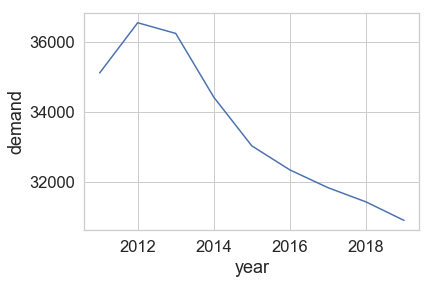

In [83]:
sns.lineplot(data=demand_data.reset_index(), x='year', y='demand')

In [84]:
mean_long_dat = pd.melt(mean_dat.drop(columns=['id','demand','frequency']).reset_index(), id_vars='year')
mean_long_dat.head()

,year,variable,value
0,2011,coal,11243.906907
1,2012,coal,15630.434915
2,2013,coal,14355.798134
3,2014,coal,11025.881341
4,2015,coal,8506.284996


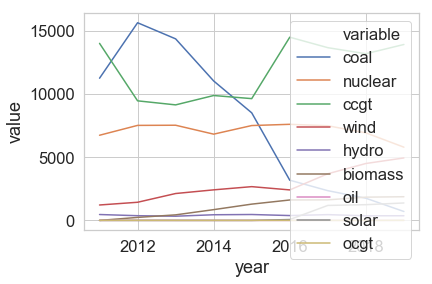

In [85]:
sns.lineplot(data=mean_long_dat, x='year', y='value', hue='variable')

mean_long_dat.to_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv')

In [86]:
hourly_dat = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-08_18-26-06-capacity_52152.csv')
hourly_dat.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,hourly_accepted_bids,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,418147.92,207262.82,88993.266144,76035.947905,3291.676233,217924.08,8577.225,"[{'plant_type': 'Recip_gas', 'segment_hours': ...",31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.614771e+10,78.67035,1342.506012


In [87]:
import yaml
extracted_dataframe = pd.DataFrame(yaml.load(hourly_dat.hourly_accepted_bids.iloc[0]))

In [88]:
extracted_dataframe.head()

,capacity_bid,plant_type,segment_hours
0,523.8,Recip_gas,55.0
1,523.8,Recip_gas,110.0
2,523.8,Recip_gas,165.0
3,523.8,Recip_gas,220.0
4,523.8,Recip_gas,275.0


In [89]:
mix = extracted_dataframe.groupby(['plant_type', 'segment_hours'])['capacity_bid'].sum().reset_index()

mix['plant_type'] = mix['plant_type'].replace("Biomass_meat","Biomass (Meat)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_poultry_litter","Biomass (Poultry Litter)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_straw","Biomass (Straw)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_wood","Biomass (Wood)")

mix.head(30)

,plant_type,segment_hours,capacity_bid
0,Biomass (Meat),55.0,13.580
1,Biomass (Meat),110.0,13.580
2,Biomass (Meat),165.0,13.580
3,Biomass (Meat),220.0,13.580
4,Biomass (Meat),275.0,13.580
5,Biomass (Meat),330.0,13.580
6,Biomass (Meat),385.0,13.580
7,Biomass (Meat),440.0,13.580
8,Biomass (Meat),495.0,13.580
9,Biomass (Meat),550.0,13.580


In [90]:
import numpy as np
mix_ontop = mix.groupby("segment_hours").apply(lambda x: x.groupby('plant_type').apply(lambda x: x.reset_index()['capacity_bid']).cumsum()).reset_index()
mix_ontop

capacity_bid,segment_hours,plant_type,0
0,55.0,Biomass (Meat),13.580000
1,55.0,Biomass (Poultry Litter),79.831000
2,55.0,Biomass (Straw),116.691000
3,55.0,Biomass (Wood),2251.661000
4,55.0,CCGT,25201.001000
5,55.0,Coal,36636.251000
6,55.0,EfW,37124.646000
7,55.0,Hydro,37765.169592
8,55.0,Nuclear,46845.339592
9,55.0,OCGT,47300.595592


In [91]:
def assign_index(x):
    try:
        x['order'] = np.array(['18', '17', '19', '20', '16', '12', '11', '10', '13', '14', '9', '15',
       '8', '21', '22', '7', '23', '0', '1', '6', '2', '3', '4', '5'])
        x['order'] = pd.to_numeric(x['order'])
        return x
    except:
        pass


mix_reordered = mix_ontop.groupby('plant_type').apply(lambda x: assign_index(x))
# mix_reordered.sort_values(by='order')
mix_reordered.head()



capacity_bid       segment_hours      plant_type      0  order
plant_type                                                    
Biomass (Meat) 0            55.0  Biomass (Meat)  13.58     18
               15          110.0  Biomass (Meat)  13.58     17
               28          165.0  Biomass (Meat)  13.58     19
               41          220.0  Biomass (Meat)  13.58     20
               55          275.0  Biomass (Meat)  13.58     16

Text(0, 0.5, 'Cumulative Electricity Generation (MW)')

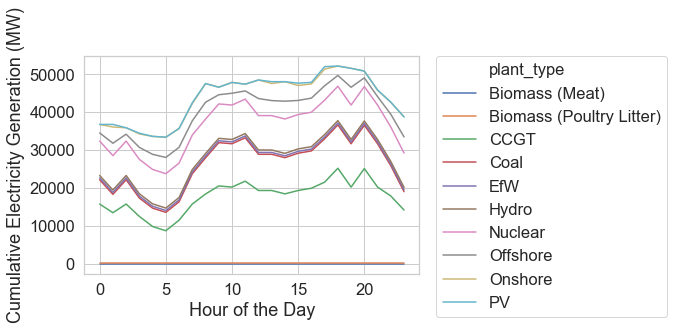

In [92]:
sns.lineplot(data=mix_reordered, x='order', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Hour of the Day')
plt.ylabel("Cumulative Electricity Generation (MW)")

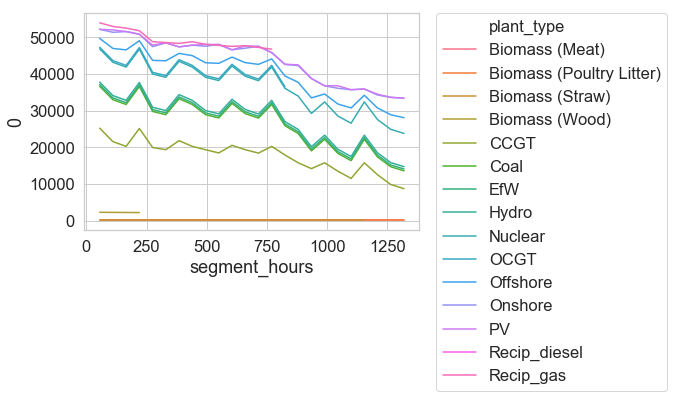

In [93]:
sns.lineplot(data = mix_ontop, x='segment_hours', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

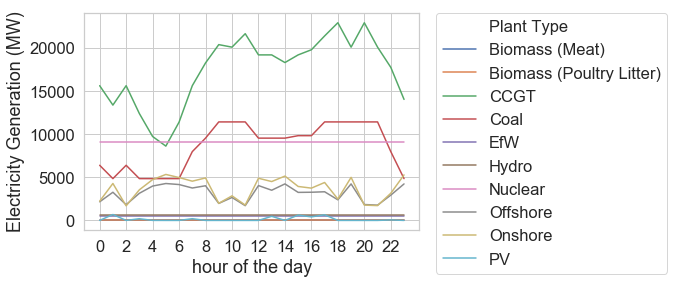

In [97]:
mix_reordered_not_ontop = mix.groupby('plant_type').apply(lambda x: assign_index(x))

# sns.lineplot(data=mix_reordered_not_ontop, x='segment_hours', y="capacity_bid", hue="plant_type")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
mix_reordered_not_ontop = mix_reordered_not_ontop.rename(columns={"plant_type":"Plant Type"})
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.lineplot(data=mix_reordered_not_ontop, x='order', y="capacity_bid", hue='Plant Type')
plt.xlabel('hour of the day')
plt.ylabel("Electricity Generation (MW)")
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_xticks(list(range(0,24,2)))
plt.savefig('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/figures/clusters_results_single_day.pdf', dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')



In [95]:
mix_reordered_not_ontop

plant_type  segment_hours  \
plant_type                                                              
Biomass (Meat)           0              Biomass (Meat)           55.0   
                         1              Biomass (Meat)          110.0   
                         2              Biomass (Meat)          165.0   
                         3              Biomass (Meat)          220.0   
                         4              Biomass (Meat)          275.0   
                         5              Biomass (Meat)          330.0   
                         6              Biomass (Meat)          385.0   
                         7              Biomass (Meat)          440.0   
                         8              Biomass (Meat)          495.0   
                         9              Biomass (Meat)          550.0   
                         10             Biomass (Meat)          605.0   
                         11             Biomass (Meat)          660.0   
                         12             Biomass (Meat)          715.0   
                         13             Biomass (Meat)          770.0   
                         14             Biomass (Meat)          825.0   
                         15             Biomass (Meat)          880.0   
                         16             Biomass (Meat)          935.0   
                         17             Biomass (Meat)          990.0   
                         18             Biomass (Meat)         1045.0   
                         19             Biomass (Meat)         1100.0   
                         20             Biomass (Meat)         1155.0   
                         21             Biomass (Meat)         1210.0   
                         22             Biomass (Meat)         1265.0   
                         23             Biomass (Meat)         1320.0   
Biomass (Poultry Litter) 24   Biomass (Poultry Litter)           55.0   
                         25   Biomass (Poultry Litter)          110.0   
                         26   Biomass (Poultry Litter)          165.0   
                         27   Biomass (Poultry Litter)          220.0   
                         28   Biomass (Poultry Litter)          275.0   
                         29   Biomass (Poultry Litter)          330.0   
...                                                ...            ...   
Onshore                  246                   Onshore         1045.0   
                         247                   Onshore         1100.0   
                         248                   Onshore         1155.0   
                         249                   Onshore         1210.0   
                         250                   Onshore         1265.0   
                         251                   Onshore         1320.0   
PV                       252                        PV           55.0   
                         253                        PV          110.0   
                         254                        PV          165.0   
                         255                        PV          220.0   
                         256                        PV          275.0   
                         257                        PV          330.0   
                         258                        PV          385.0   
                         259                        PV          440.0   
                         260                        PV          495.0   
                         261                        PV          550.0   
                         262                        PV          605.0   
                         263                        PV          660.0   
                         264                        PV          715.0   
                         265                        PV          770.0   
                         266                        PV          825.0   
                         267                        PV          880.0   
                         268 

In [96]:
ten_year = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-09_09-39-45-capacity_52152.csv')
ten_year


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,442729.44,177471.13,88993.266144,76035.947905,3.291676e+03,217924.08,13432.075,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.723127e+10,81.482356,1336.756105
1,1,191727.60,78941.54,100898.866442,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.189050e+10,58.323130,565.357022
2,2,354648.96,171973.52,78216.415445,65331.004670,5.683637e+03,217924.08,3854.295,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.904272e+10,65.969276,1121.432794
3,3,225299.04,179174.37,85862.339992,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.234831e+10,58.477654,857.166382
4,4,427831.20,195733.56,87923.852784,76035.947905,3.291676e+03,217924.08,9224.700,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-1.847036e+10,84.955530,1338.722457
5,5,232524.96,37540.80,99686.385987,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-2.017361e+10,61.397422,555.794135
6,6,357814.08,173948.52,77276.505233,65331.004670,5.683637e+03,217924.08,4549.300,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-4.804522e+09,69.966683,1132.940528
7,7,341370.72,64879.54,84830.550313,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,1.215165e+09,65.967984,841.404106
8,8,423726.48,197206.91,87660.767056,76035.947905,3.291676e+03,217924.08,7798.800,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.893048e+10,84.449291,1329.858758
9,9,196551.00,70607.04,99388.104411,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.843817e+10,60.594222,556.550938
